In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import OrthogonalMatchingPursuit
import pickle
plt.style.use('fivethirtyeight')
%matplotlib inline

In [2]:
model_path = 'model//finalized_model.pkl'
with open(model_path, 'rb') as f:
        model = pickle.load(f)

In [3]:
df = pd.read_csv("data//data_for_preprocessing.csv")
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,Fence,MiscFeature,MiscVal,SalePrice,House_Age,Years_Since_Modified,Garage_Age,TotalBaths,LivingArea,PorchDeckSF
0,1,60,RL,65.0,8450,Pave,NoAlley,Reg,Lvl,AllPub,...,NoFence,None,0,208500,5,5,5.0,2.5,2566,61
1,2,20,RL,80.0,9600,Pave,NoAlley,Reg,Lvl,AllPub,...,NoFence,None,0,181500,31,31,31.0,2.0,2524,298
2,3,60,RL,68.0,11250,Pave,NoAlley,IR1,Lvl,AllPub,...,NoFence,None,0,223500,7,6,7.0,2.5,2706,42
3,4,70,RL,60.0,9550,Pave,NoAlley,IR1,Lvl,AllPub,...,NoFence,None,0,140000,91,36,8.0,1.0,2473,307
4,5,60,RL,84.0,14260,Pave,NoAlley,IR1,Lvl,AllPub,...,NoFence,None,0,250000,8,8,8.0,2.5,3343,276


In [4]:
X = df.drop(columns = ['SalePrice'])
y = df['SalePrice']
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size = 0.1, random_state = 42)

In [5]:
trainId = X_train.Id
testId = X_test.Id
X_train = X_train.drop(columns = 'Id')
X_test = X_test.drop(columns = 'Id')
X_train['MSSubClass'] = X_train['MSSubClass'].astype('str')
X_test['MSSubClass'] = X_test['MSSubClass'].astype('str')

In [6]:
num_features = X_train.select_dtypes(include = np.number).columns
cat_features = X_train.select_dtypes(include = 'object').columns

In [7]:
model.fit(X_train, y_train)

Pipeline(steps=[('data_preprocessing',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('num_imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'B...
                                                  Index(['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl',
       'Exterior1st

In [8]:
cv_results = cross_validate(model, X_train, y_train,  cv=5, scoring = ('r2','neg_mean_squared_error'),  n_jobs=-1)
cv_results

{'fit_time': array([0.11668873, 0.10372281, 0.12865615, 0.09175467, 0.08577132]),
 'score_time': array([0.03291059, 0.02692628, 0.04388404, 0.02293777, 0.02991939]),
 'test_r2': array([0.88199256, 0.87802613, 0.88996349, 0.91388881, 0.8884939 ]),
 'test_neg_mean_squared_error': array([-6.59537570e+08, -9.24864743e+08, -6.38740016e+08, -6.08281959e+08,
        -5.83689276e+08])}

In [9]:
y_pred = model.predict(X_test)

In [10]:
r2_score(y_test, y_pred), (mean_squared_error(y_test, y_pred)**0.5)

(0.90073969303818, 25008.93796098928)

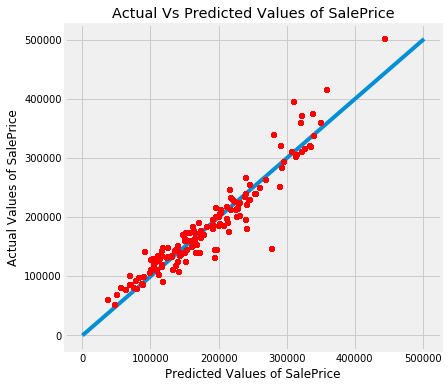

In [11]:
plt.figure(figsize = (6,6))
plt.scatter(y_pred, y_test, s = 30, c='red',marker = '+', zorder = 10)
plt.xlabel('Predicted Values of SalePrice')
plt.ylabel('Actual Values of SalePrice')
plt.title('Actual Vs Predicted Values of SalePrice')
plt.plot([0,np.max(y_test)], [0,np.max(y_test)])